In [1]:
#Installing relevent packages
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib
import glob
from primaite import PRIMAITE_PATHS
from pathlib import Path


# Define helper functions
 Function to convert a list of csvs into a dataframe
 
 Function to find relevant csvs and plot them

In [2]:
def dataframe_constructor(csv_list, df_list, model):
    # Base case, if csv_list is empty then concatenate dataframes
    if len(csv_list) == 0:
        final_df = pd.concat(df_list, axis=1)
        final_df.index.name='Episode'
        final_df.index += 1
        return final_df
    # Recursive case, if csv_list is not empty then we have more csvs to convert to dataframes
    else:
       csv_to_to_append = csv_list.pop()
       df_to_append = pd.read_csv(csv_to_to_append, usecols=['Average Reward'])
       new_col_name = model + '_' + csv_to_to_append.name[27:-4]
       df_to_append.rename(columns={'Average Reward': new_col_name}, inplace=True)
       df_list.append(df_to_append)
       return dataframe_constructor(csv_list, df_list, model)
    
#We need to extract the files and store them
def generate_plot(subfolders_to_search,window,name, repo_folder = None, xlimits:list = None, ylimits: list = None):
    model_df_dict = {}
        
    # Find csvs and convert to dataframes
    if repo_folder is not None:
        model = repo_folder
        #repo_reward_folder_path = Path(f'..\\previous_sessions\\{repo_folder}\\average_rewards')
        repo_reward_folder_path = Path(f'..\\..\\previous_sessions\\{model}\\average_rewards')
        model_ave_reward_files = [filename for filename in repo_reward_folder_path.glob('average*')]
        model_df = dataframe_constructor(model_ave_reward_files, [], model)
        model_df_dict[f'{model}'] = model_df.rolling(window=window, center=False).mean()
    else:
        for model in subfolders_to_search:
            model_ave_reward_files = []
            for time_stamp in subfolders_to_search[model]:
                time_stamp_files_path = Path.joinpath(PRIMAITE_PATHS.user_sessions_path.parent,'Hyperparameters',model,time_stamp)
                model_time_stamp_ave_reward_files = [filename for filename in time_stamp_files_path.glob('average*')]
                model_ave_reward_files += model_time_stamp_ave_reward_files
            model_df = dataframe_constructor(model_ave_reward_files, [], model)
            model_df_dict[f'{model}'] = model_df.rolling(window=window, center=False).mean()

        
            all_models_df = pd.concat(list(model_df_dict.values()), axis=1)

    if repo_folder is not None:
        title = name
        columns = model_df_dict[model].columns.to_list()
        model_df_dict[model] = model_df_dict[model].rename(columns={col:col[len(model)+1:] for col in columns})
    else:
        if len(subfolders_to_search)==1:
            if name is None:
                title = model
            else:
                title = name
            columns = model_df_dict[model].columns.to_list()
            model_df_dict[model] = model_df_dict[model].rename(columns={col:col[len(model)+1:] for col in columns})
        else:
            title = None

    lineStyle = ['-','--',':','.-']
    ax = None
    cmap = plt.get_cmap()
    for iM, model in enumerate(model_df_dict.keys()):
        ax = model_df_dict[model].plot(ax=ax,
                lw=1, 
                figsize=(15,7),
                linestyle = lineStyle[iM],
                grid=True,
                cmap=cmap)
    ax.legend(loc='upper left')
    if ylimits is not None:
        plt.ylim(ylimits[0], ylimits[1])
    if xlimits is not None:
        plt.xlim(xlimits[0], xlimits[1])
    plt.xlabel('Episode', fontsize=16)
    plt.ylabel(f'Average Step Reward ({window} Episodes)', fontsize=15)
    plt.title(title, fontsize=17)
    plt.ticklabel_format(axis='y', style='sci', scilimits=(2,4))
    plt.savefig(f'{name}.png', bbox_inches='tight')
    plt.show()


## Baseline NN case


### 2 x 64 Neural Network

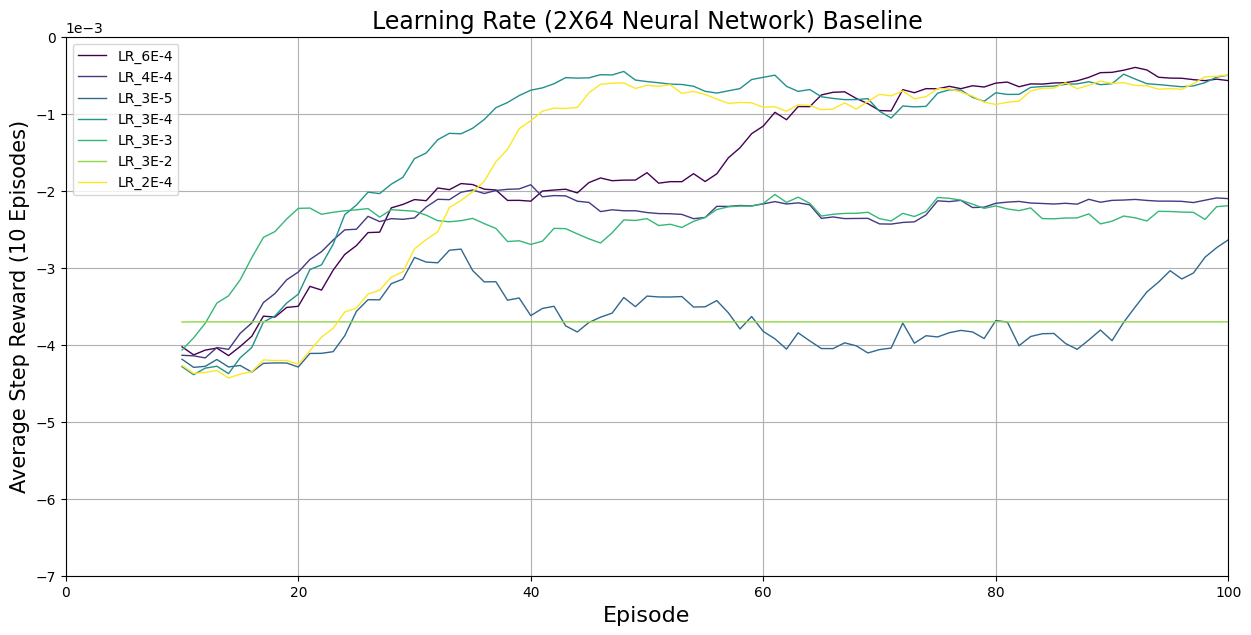

In [12]:
repo_folder_to_plot = 'Baseline_2X64_NN_LR_100_episodes'
name = 'Learning Rate (2X64 Neural Network) Baseline'
window = 10
generate_plot({},window,name, repo_folder=repo_folder_to_plot, xlimits=[0,100], ylimits=[-7e-3,0])

### 2 X 128 Neural Network

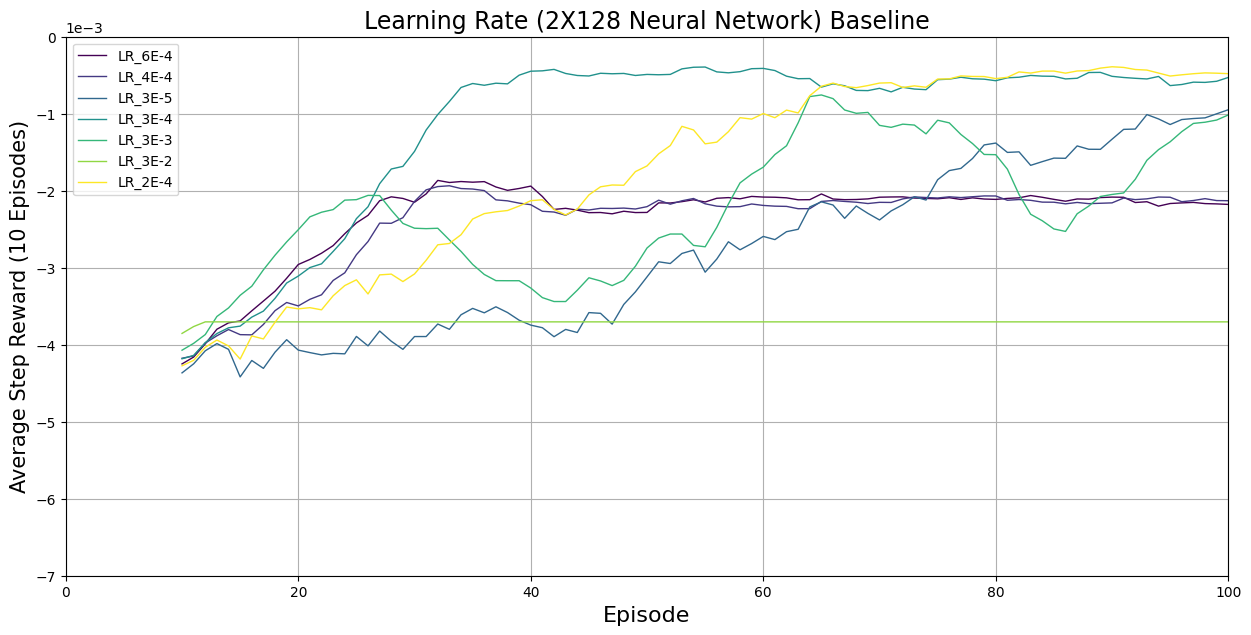

In [13]:
repo_folder_to_plot = 'Baseline_2X128_NN_LR_100_episodes'
name = 'Learning Rate (2X128 Neural Network) Baseline'
window = 10
generate_plot({},window,name, repo_folder=repo_folder_to_plot, xlimits=[0,100], ylimits=[-7e-3,0])

## Complex NN case

### 2 x 64 Neural Network

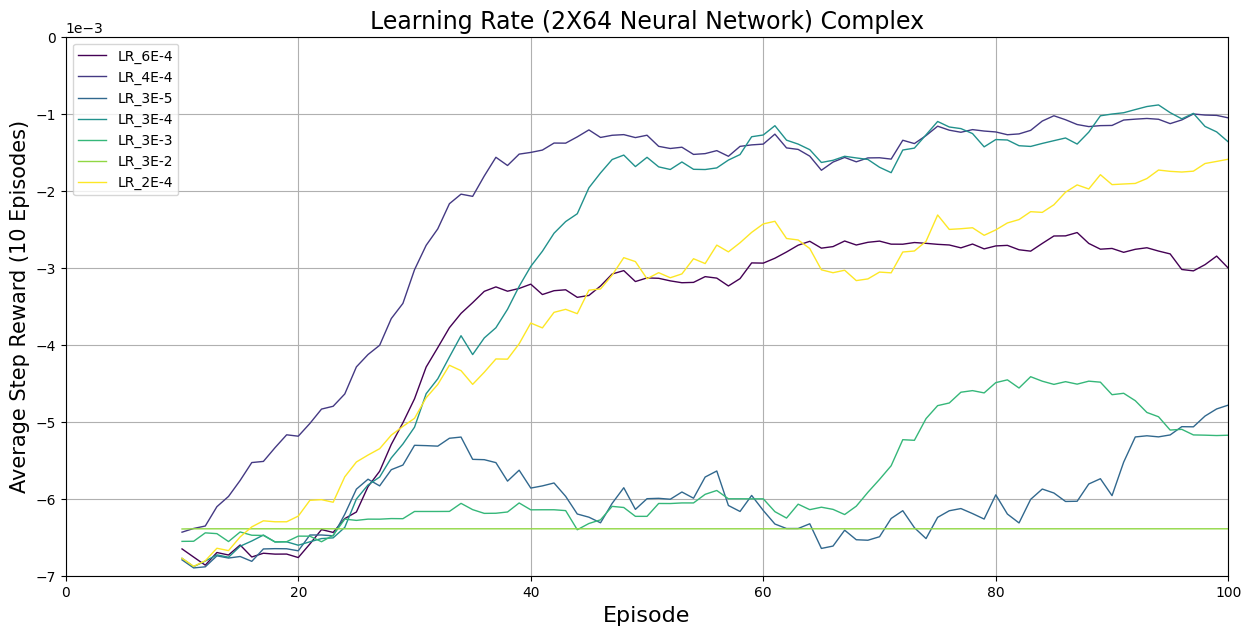

In [11]:
repo_folder_to_plot = 'Complex_2X64_NN_LR_100_episodes'
name = 'Learning Rate (2X64 Neural Network) Complex'
window = 10
generate_plot({},window,name, repo_folder=repo_folder_to_plot, xlimits=[0,100], ylimits=[-7e-3,0])

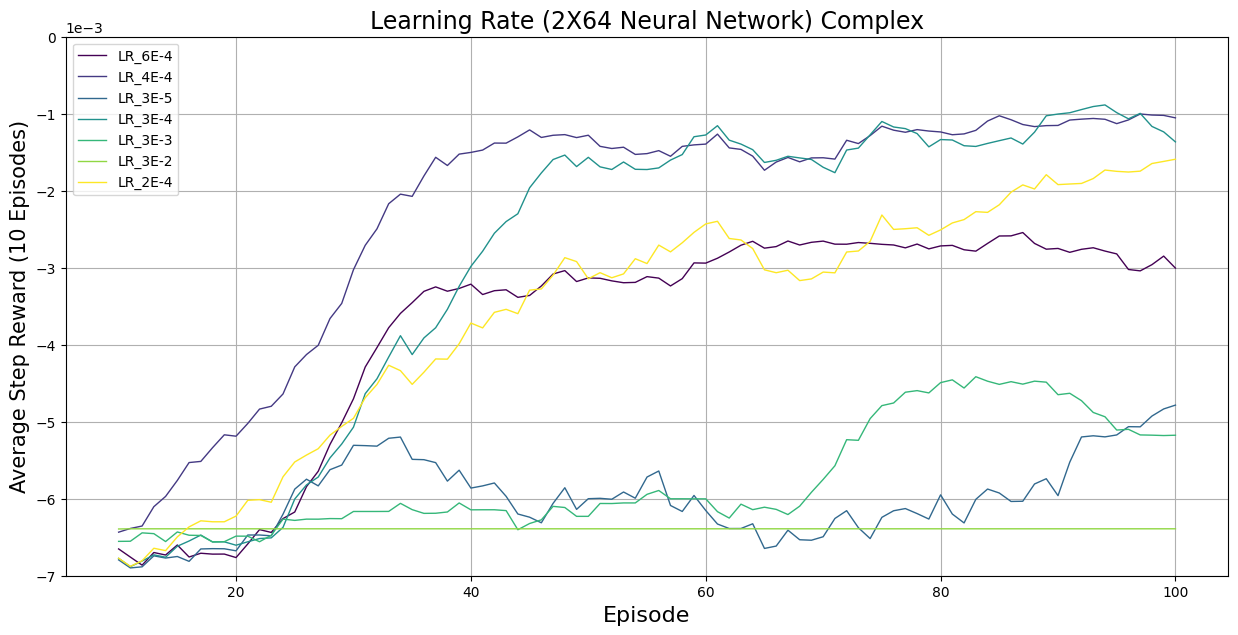

In [9]:
repo_folder_to_plot = 'Complex_2X64_NN_LR_100_episodes'
name = 'Learning Rate (2X64 Neural Network) Complex'
window = 10
generate_plot({},window,name, repo_folder=repo_folder_to_plot, ylimits=[-7e-3,0])

### 2x128 Neural Network

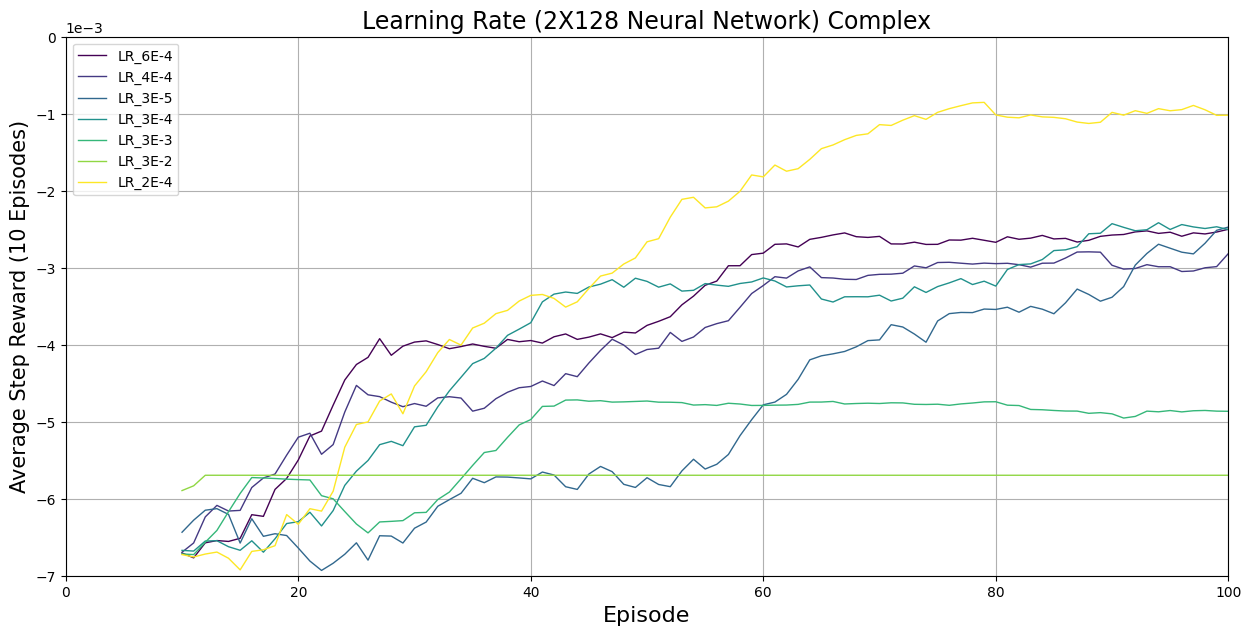

In [45]:
repo_folder_to_plot = 'Complex_2X128_NN_LR_100_episodes'
name = 'Learning Rate (2X128 Neural Network) Complex'
window = 10
generate_plot({},window,name, repo_folder=repo_folder_to_plot, xlimits=[0,100], ylimits=[-7e-3,0])

## Complex case with baseline trained agents

### 2x64 Neural Network

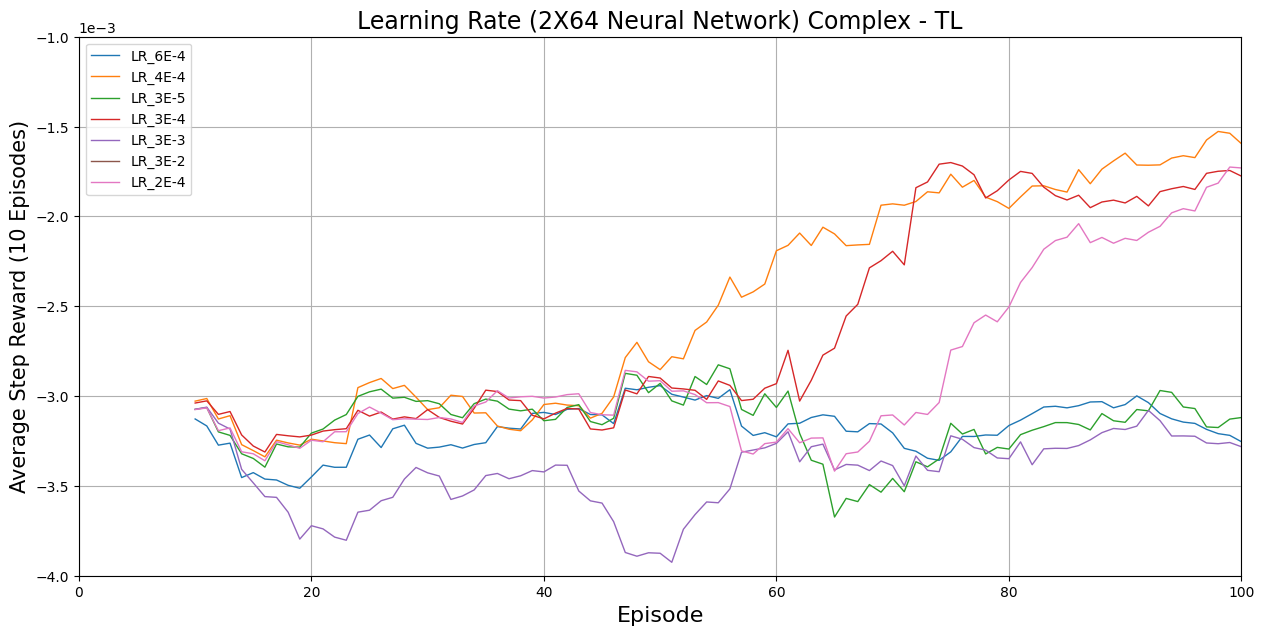

In [66]:
repo_folder_to_plot = 'Complex_2X64_NN_LR_200_episodes_50ep_trained_agent'
name = 'Learning Rate (2X64 Neural Network) Complex - TL'
window =10
generate_plot({},window,name, repo_folder=repo_folder_to_plot, xlimits=[0,100], ylimits=[-4e-3,-1e-3])

### 2 x 128 Neural Network 

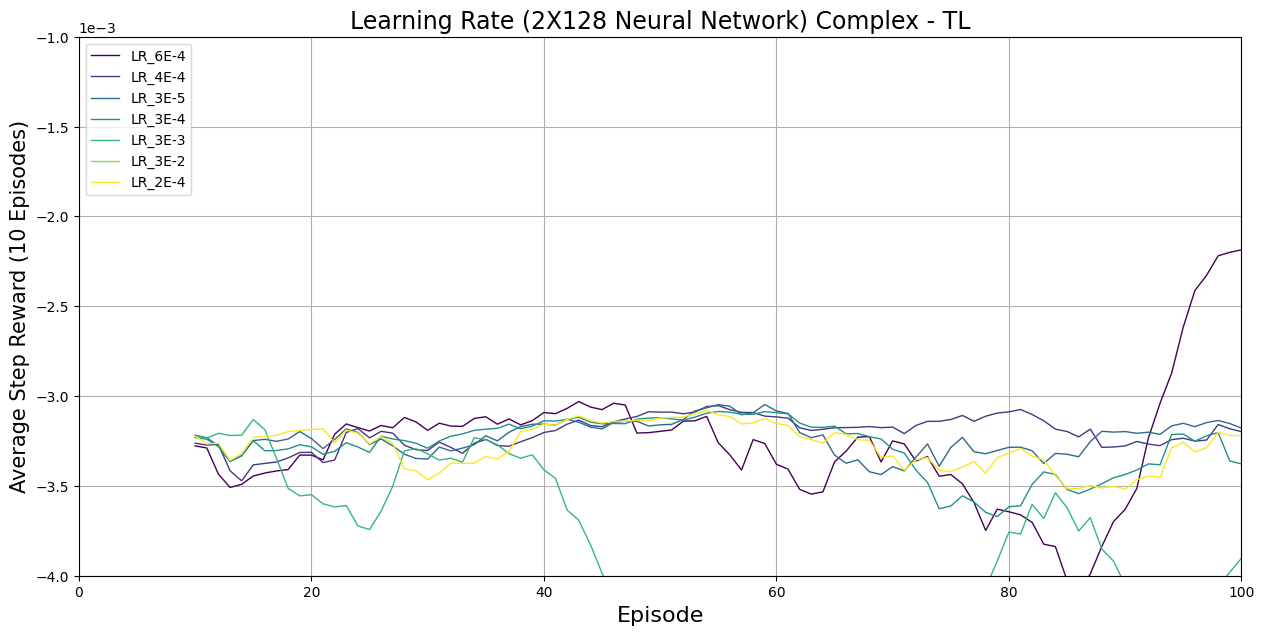

In [64]:
repo_folder_to_plot = 'Complex_2X128_NN_LR_200_episodes_50ep_trained_agent'
name = 'Learning Rate (2X128 Neural Network) Complex - TL'
window = 10
generate_plot({},window,name, repo_folder=repo_folder_to_plot, xlimits=[0,100], ylimits=[-4e-3,-1e-3])

## Initial training conclusions

1. We can just stick with 2 x 64 for convenience.
2. The LR optimised complex TL case starts with a greater average step reward than the complex case, but takes a lot more data iterations to train.

For the purpose of this project this may be fine - replacing a NN with a DBM may still increase the data efficiency of the respective case. However, it's likely that the TL agent is starting off in a more localised minimum than what it would with randomised initial weights, and so we should favour exploration over exploitation, relative to the default case. We therefore perform sensitivity studys over PPO's Entropy Beta parameter, which influences the exploration-exploitation trade-off.

https://www.restack.io/p/hyperparameter-tuning-answer-ppo-algorithm-hyperparameters-cat-ai

## Entropy study

Adjusting the entropy from the default case (0) did significanlty not help learning.

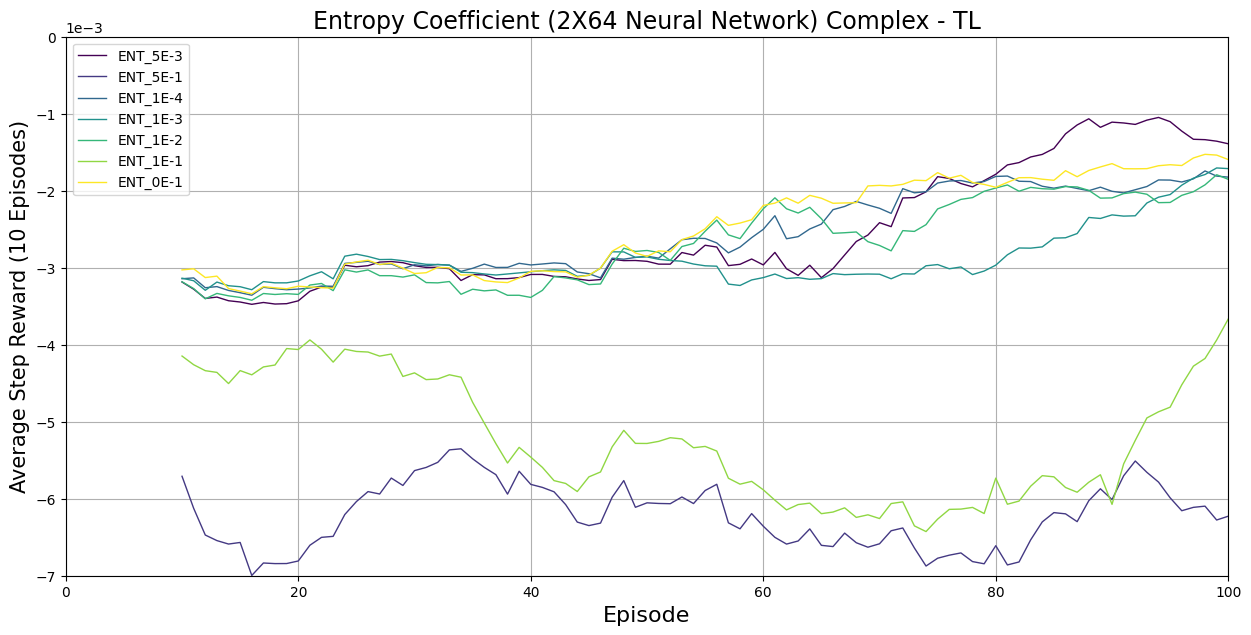

In [48]:
repo_folder_to_plot = 'Complex_2X64_NN_ENT_100_episodes_50ep_trained_agent'
name = 'Entropy Coefficient (2X64 Neural Network) Complex - TL'
window =10
generate_plot({},window,name, repo_folder=repo_folder_to_plot, xlimits=[0,100], ylimits=[-7e-3,0])

## Value function coefficent study

Adjusting the value function coefficient from the default case (0.5) did not significantly help learning.

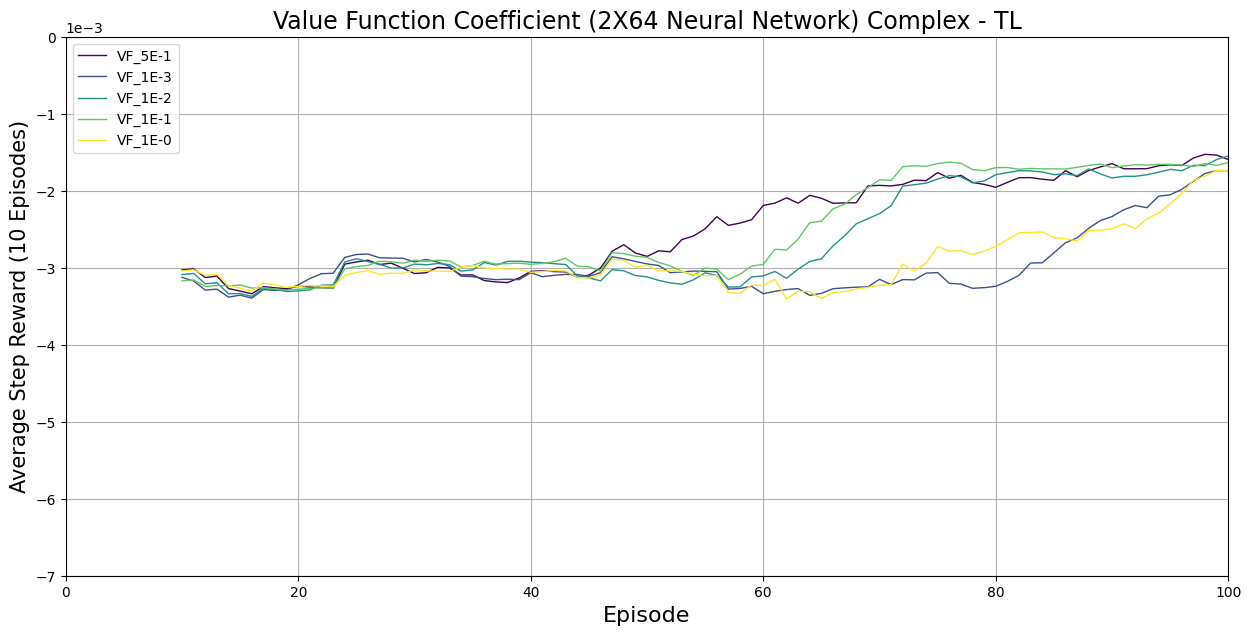

In [68]:
repo_folder_to_plot = 'Complex_2X64_NN_VF_100_episodes_50ep_trained_agent'
name = 'Value Function Coefficient (2X64 Neural Network) Complex - TL'
window =10
generate_plot({},window,name, repo_folder=repo_folder_to_plot, xlimits=[0,100], ylimits=[-7e-3,0])

## Random seed study

Adjusting the random seed from the one we've been using doesn't change the TL results but does change the non TLts. From scanning the code, it appears that seed is used when setting up the inital network weights, but is not implementing in the PrimAITE environment. This explains the graphs, in the TL case we are using predetermined weights.

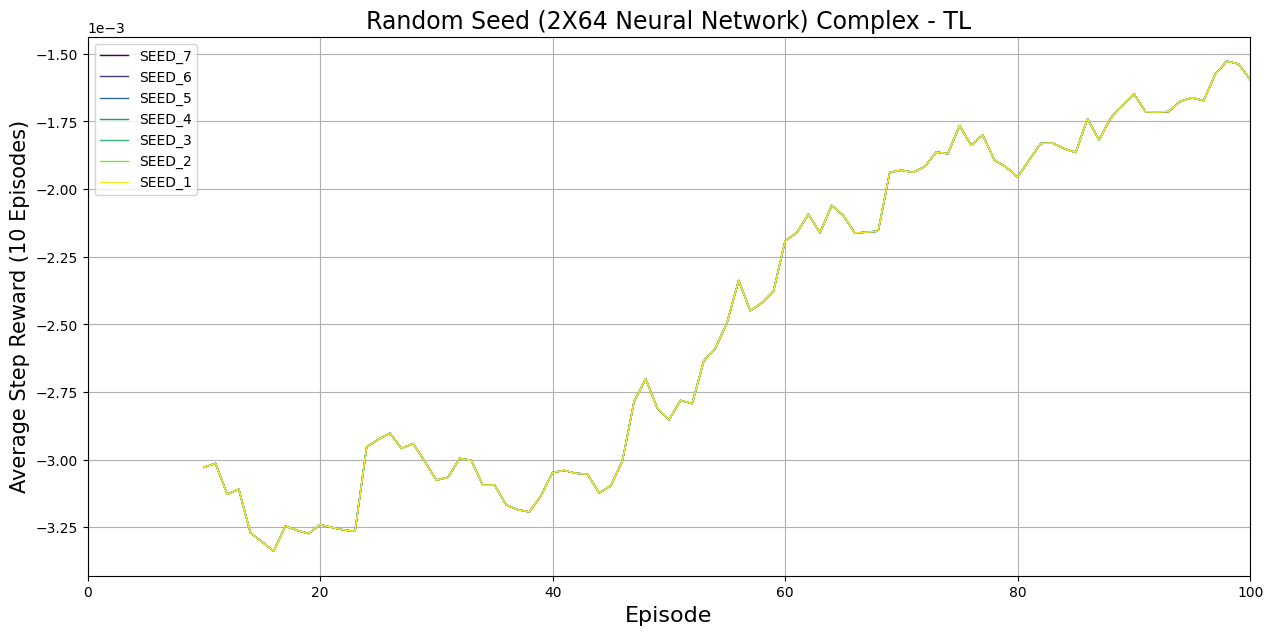

In [50]:
repo_folder_to_plot = 'Complex_2X64_NN_SEED_100_episodes_50ep_trained_agent'
name = 'Random Seed (2X64 Neural Network) Complex - TL'
window =10
generate_plot({},window,name, repo_folder=repo_folder_to_plot, xlimits=[0,100])

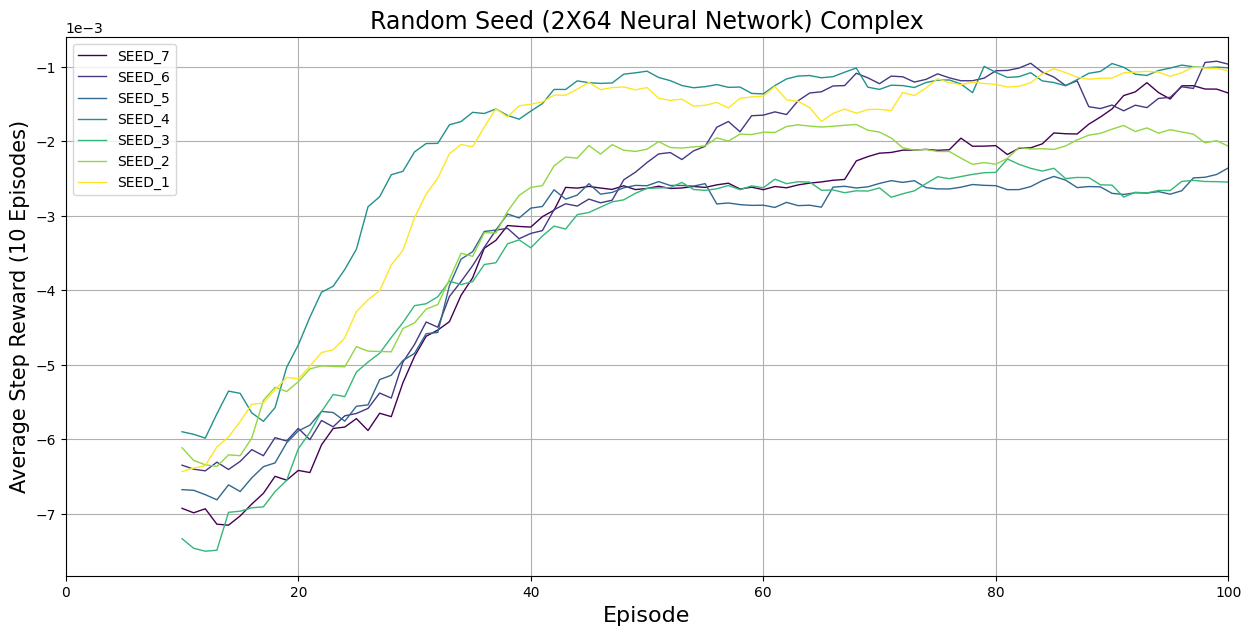

In [51]:
repo_folder_to_plot = 'Complex_2X64_NN_SEED_100_episodes'
name = 'Random Seed (2X64 Neural Network) Complex'
window =10
generate_plot({},window,name, repo_folder=repo_folder_to_plot, xlimits=[0,100])

## TL vs no TL plot

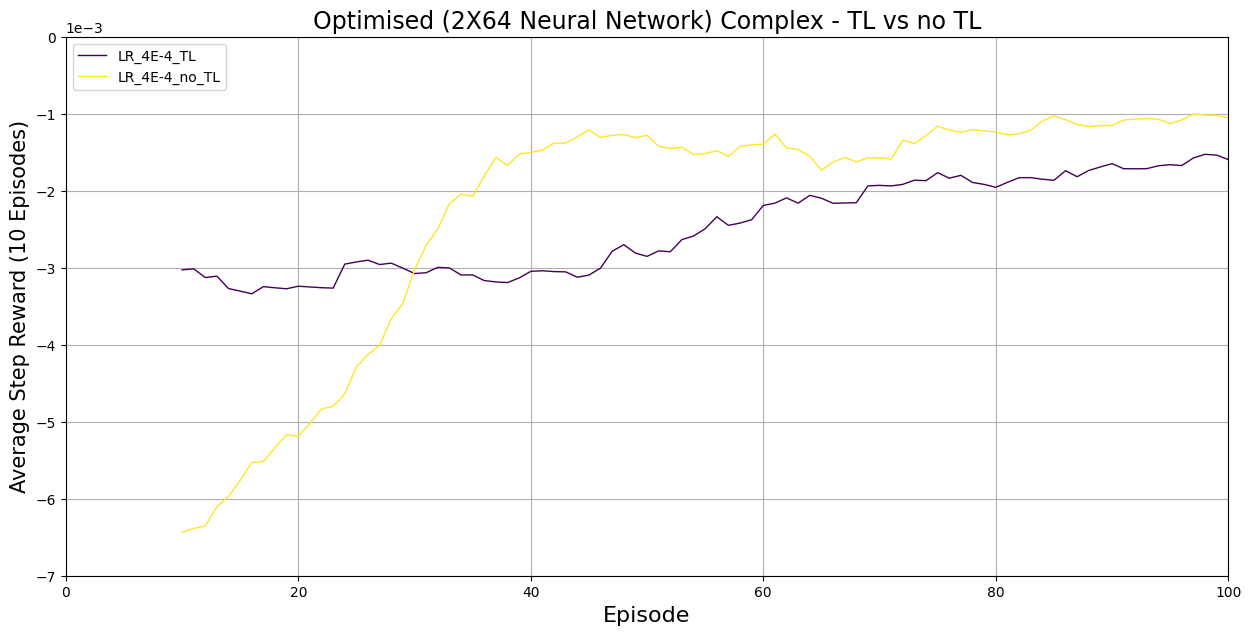

In [17]:
subfolders_to_search_DBM: dict = {'_2x64_TL_no_TL_comparison': ['results']}
name = 'Optimised (2X64 Neural Network) Complex - TL vs no TL'
window = 10
generate_plot(subfolders_to_search_DBM,window,name, xlimits=[0,100], ylimits=[-7e-3,0])

## Comparing fresh, 10ep, 20ep, 30ep, 40ep, 50ep and 100ep trained baseline agents on the TL complex case

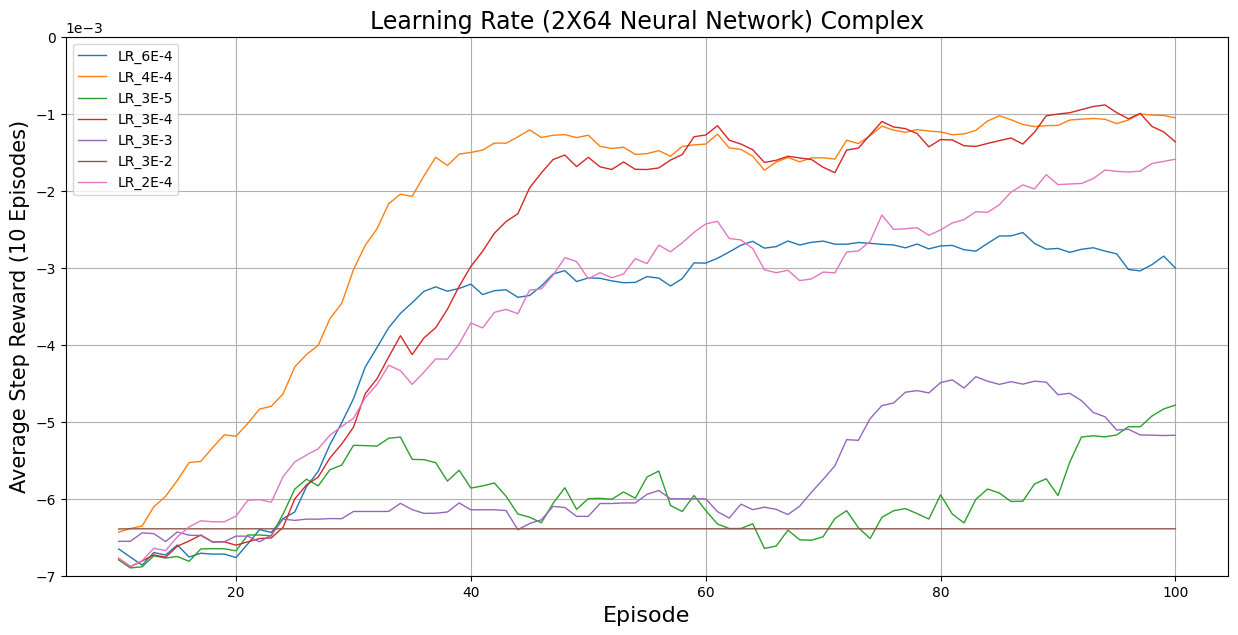

In [14]:
repo_folder_to_plot = 'Complex_2X64_NN_LR_100_episodes'
name = 'Learning Rate (2X64 Neural Network) Complex'
window = 10
generate_plot({},window,name, repo_folder=repo_folder_to_plot, ylimits=[-7e-3,0])

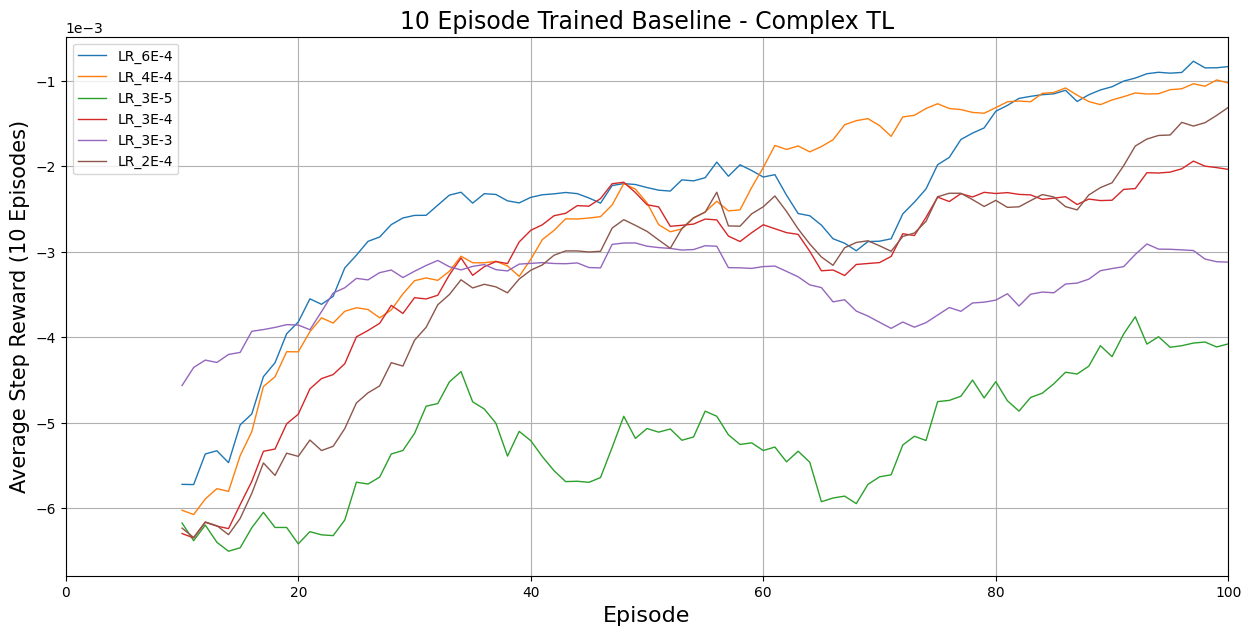

In [9]:
repo_folder_to_plot = 'Complex_2X64_NN_LR_100_episodes_10ep_trained_agent'
name = '10 Episode Trained Baseline - Complex TL'
window =10
generate_plot({},window,name, repo_folder=repo_folder_to_plot, xlimits=[0,100])

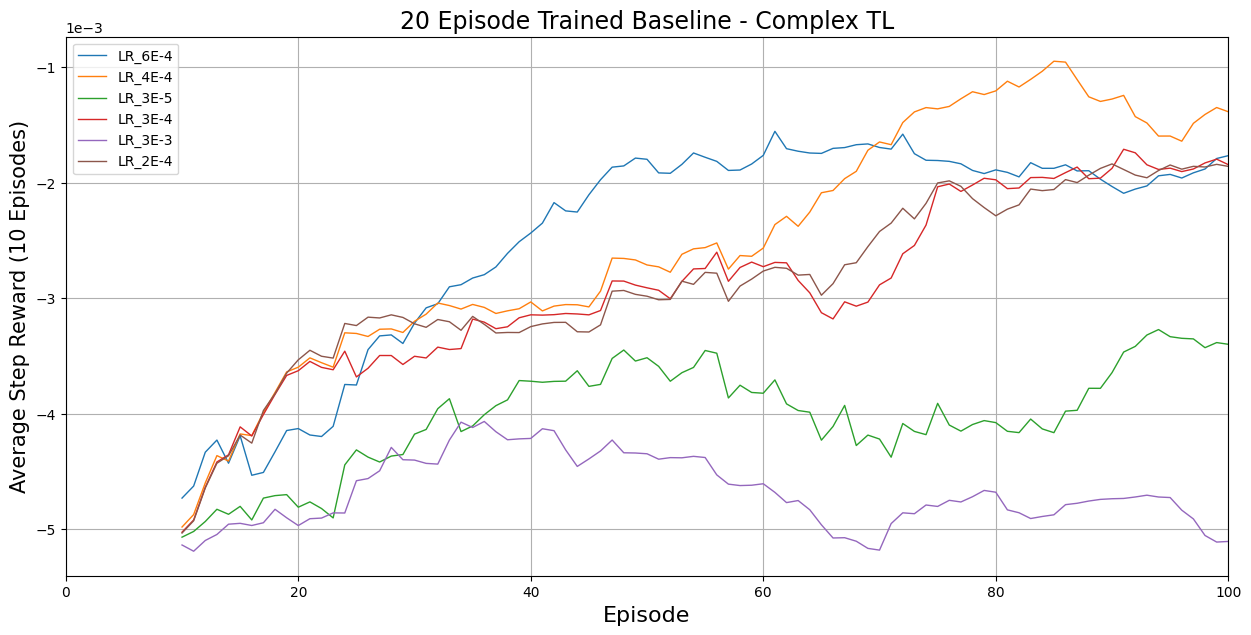

In [10]:
repo_folder_to_plot = 'Complex_2X64_NN_LR_100_episodes_20ep_trained_agent'
name = '20 Episode Trained Baseline - Complex TL'
window =10
generate_plot({},window,name, repo_folder=repo_folder_to_plot, xlimits=[0,100])

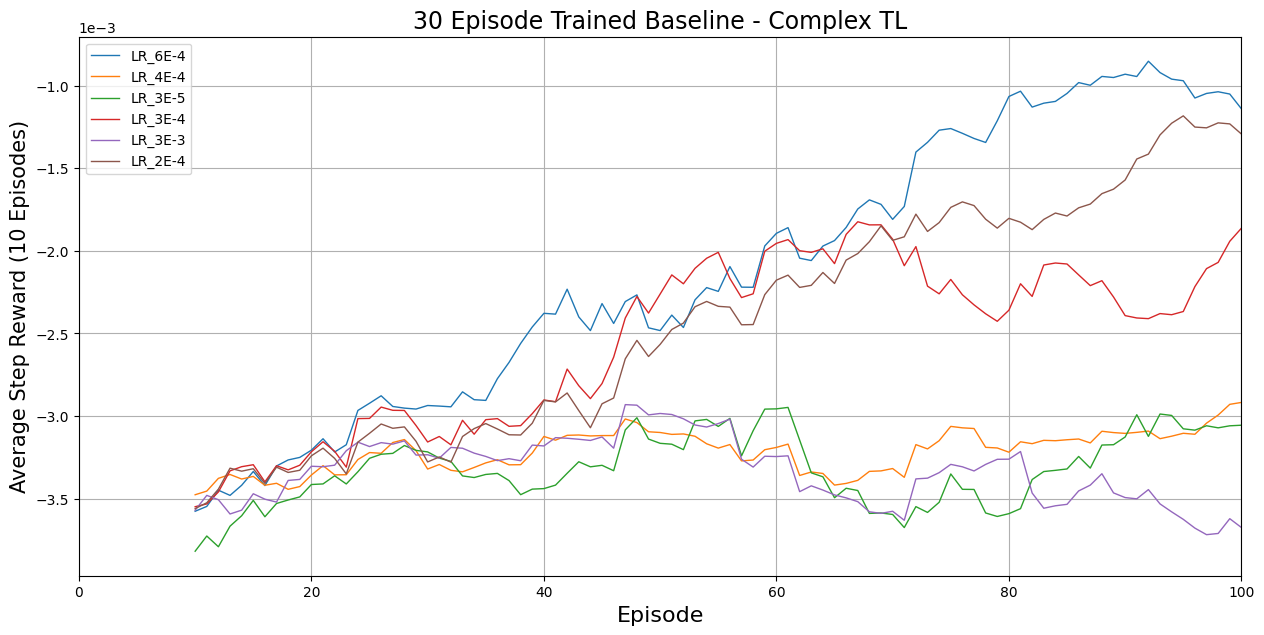

In [11]:
repo_folder_to_plot = 'Complex_2X64_NN_LR_100_episodes_30ep_trained_agent'
name = '30 Episode Trained Baseline - Complex TL'
window =10
generate_plot({},window,name, repo_folder=repo_folder_to_plot, xlimits=[0,100])

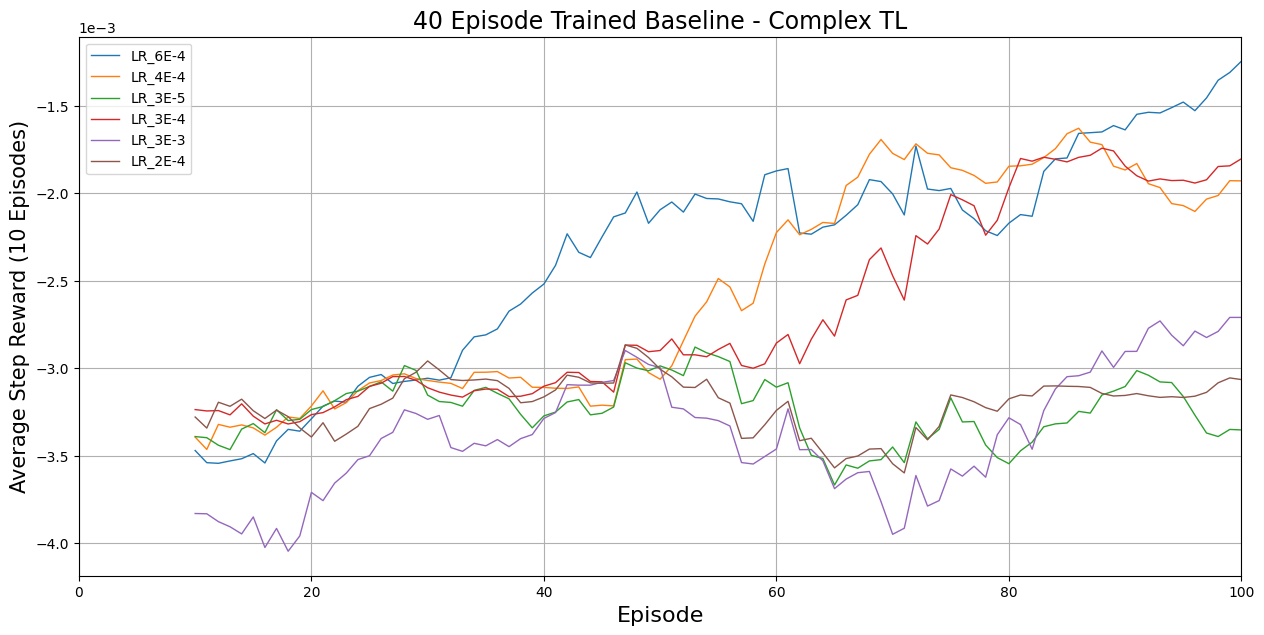

In [12]:
repo_folder_to_plot = 'Complex_2X64_NN_LR_100_episodes_40ep_trained_agent'
name = '40 Episode Trained Baseline - Complex TL'
window =10
generate_plot({},window,name, repo_folder=repo_folder_to_plot, xlimits=[0,100])

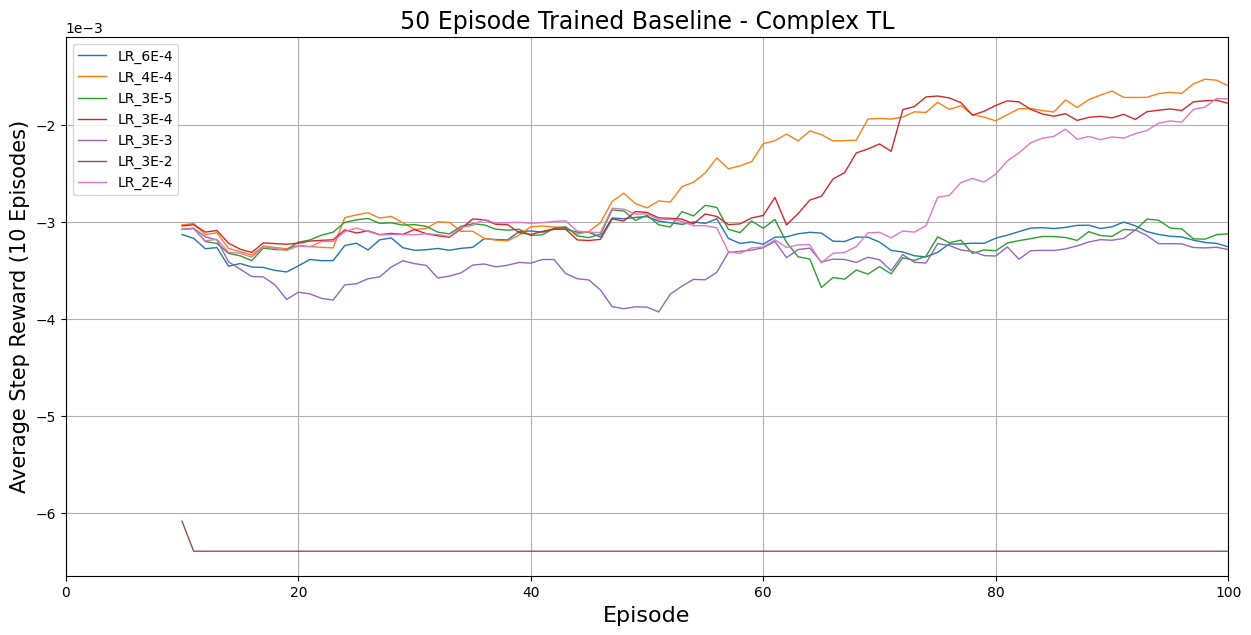

In [13]:
repo_folder_to_plot = 'Complex_2X64_NN_LR_200_episodes_50ep_trained_agent_redo'
name = '50 Episode Trained Baseline - Complex TL'
window =10
generate_plot({},window,name, repo_folder=repo_folder_to_plot, xlimits=[0,100])

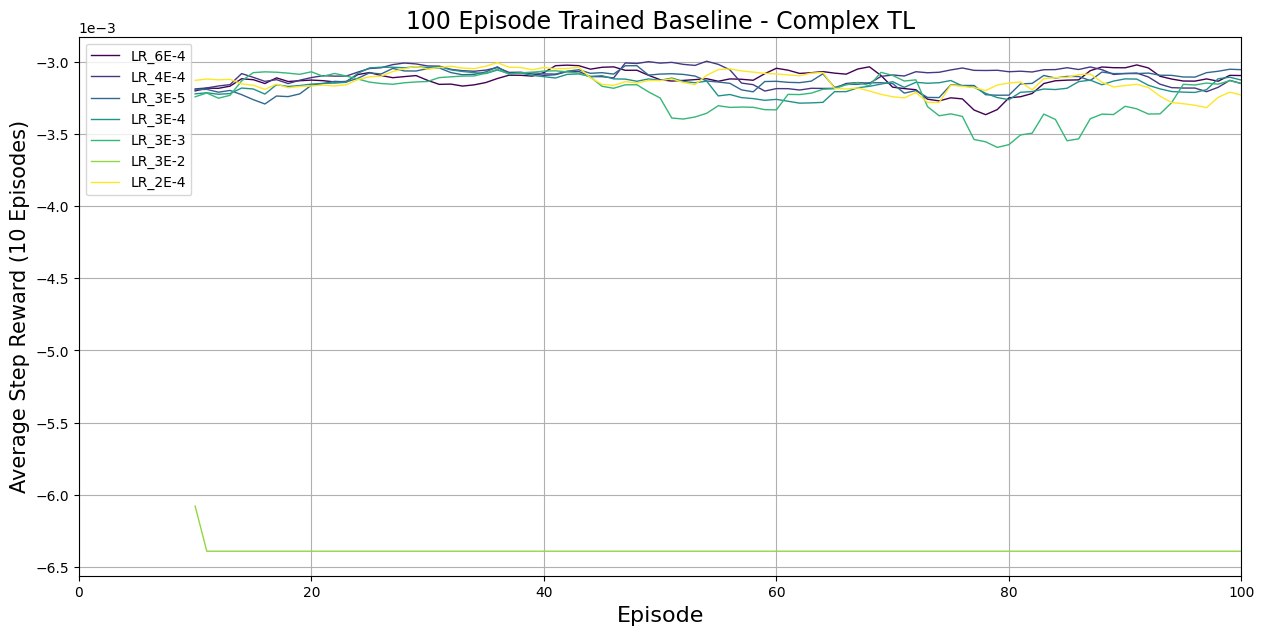

In [6]:
repo_folder_to_plot = 'Complex_2X64_NN_LR_100_episodes_100ep_trained_agent'
name = '100 Episode Trained Baseline - Complex TL'
window =10
generate_plot({},window,name, repo_folder=repo_folder_to_plot, xlimits=[0,100])

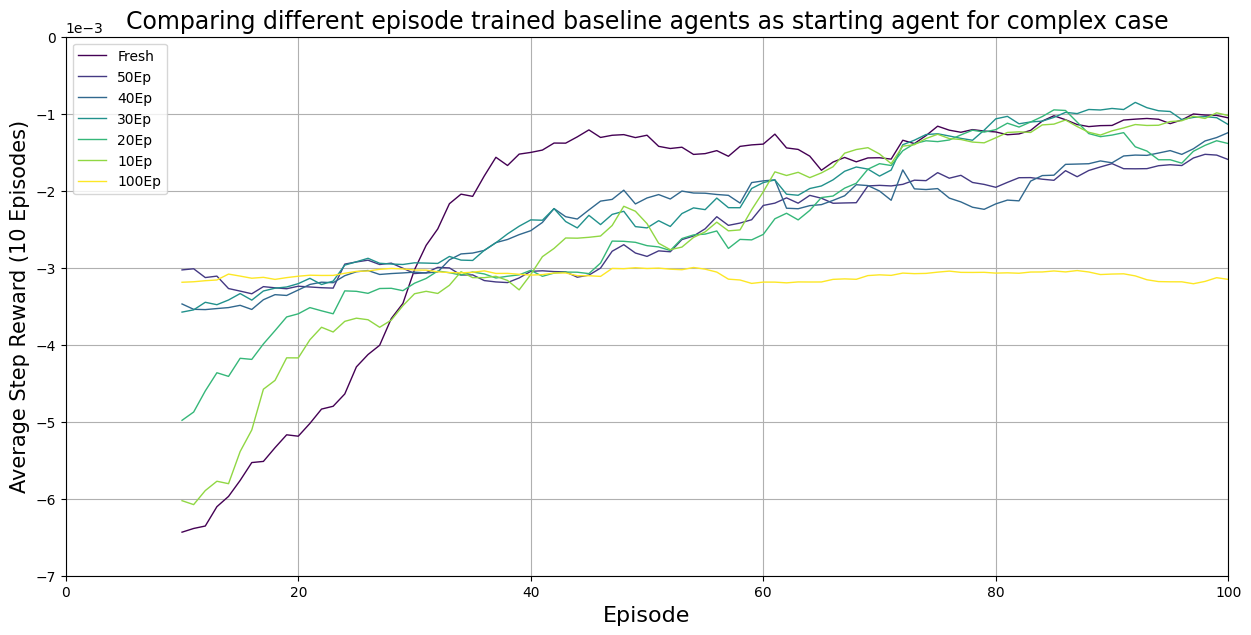

In [21]:
subfolders_to_search_DBM: dict = {'_comparing_different_ep_trained_agents': ['all_results']}
name = 'Comparing different episode trained baseline agents as starting agent for complex case'
window = 10
generate_plot(subfolders_to_search_DBM,window,name, xlimits=[0,100], ylimits=[-7e-3,0])

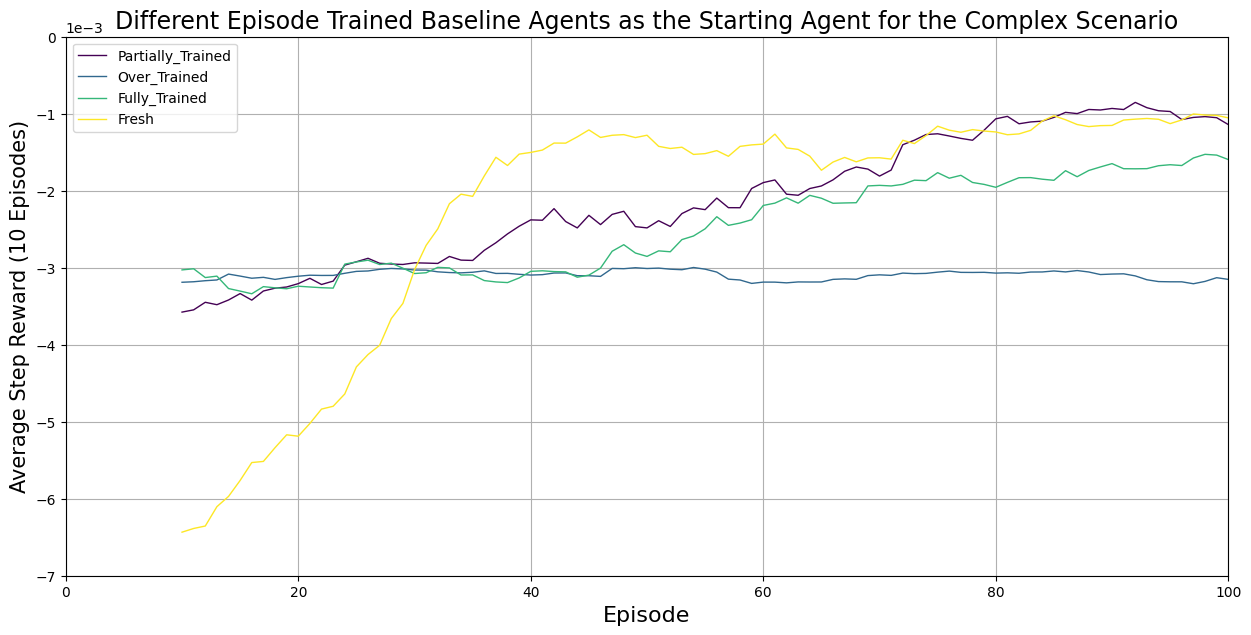

In [19]:
subfolders_to_search_DBM: dict = {'_comparing_different_ep_trained_agents': ['results']}
name = 'Different Episode Trained Baseline Agents as the Starting Agent for the Complex Scenario'
window = 10
generate_plot(subfolders_to_search_DBM,window,name, xlimits=[0,100], ylimits=[-7e-3,0])

## Transfer Learning Without Using Baseline Data

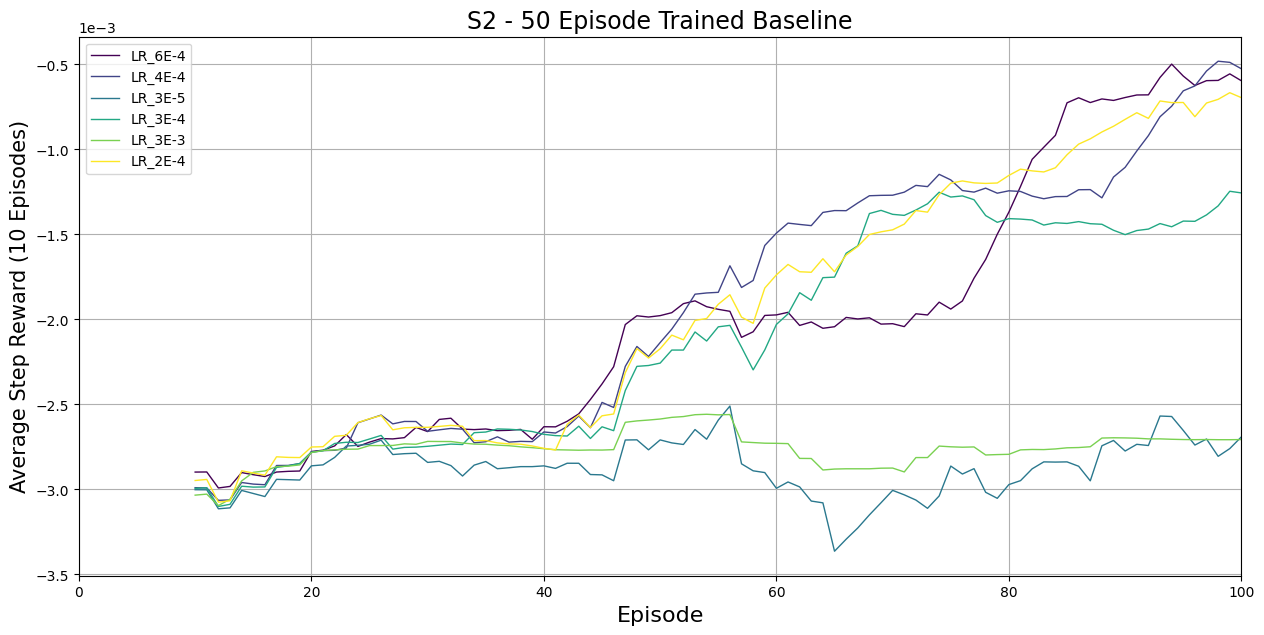

In [6]:
repo_folder_to_plot = 'S2_2X64_NN_LR_100_episodes_50ep_trained_agent'
name = 'S2 - 50 Episode Trained Baseline'
window =10
generate_plot({},window,name, repo_folder=repo_folder_to_plot, xlimits=[0,100])

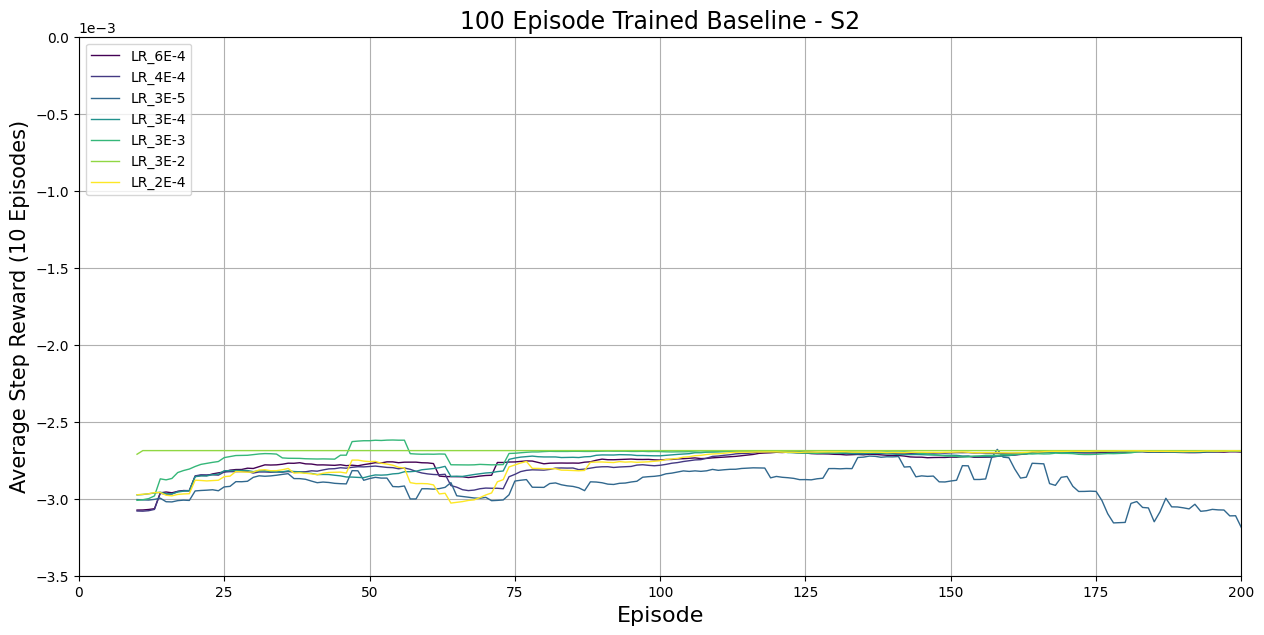

In [12]:
repo_folder_to_plot = 'S2_2X64_NN_LR_200_episodes_100ep_trained_agent'
name = '100 Episode Trained Baseline - S2'
window =10
generate_plot({},window,name, repo_folder=repo_folder_to_plot, xlimits=[0,200], ylimits=[-3.5e-3,0])

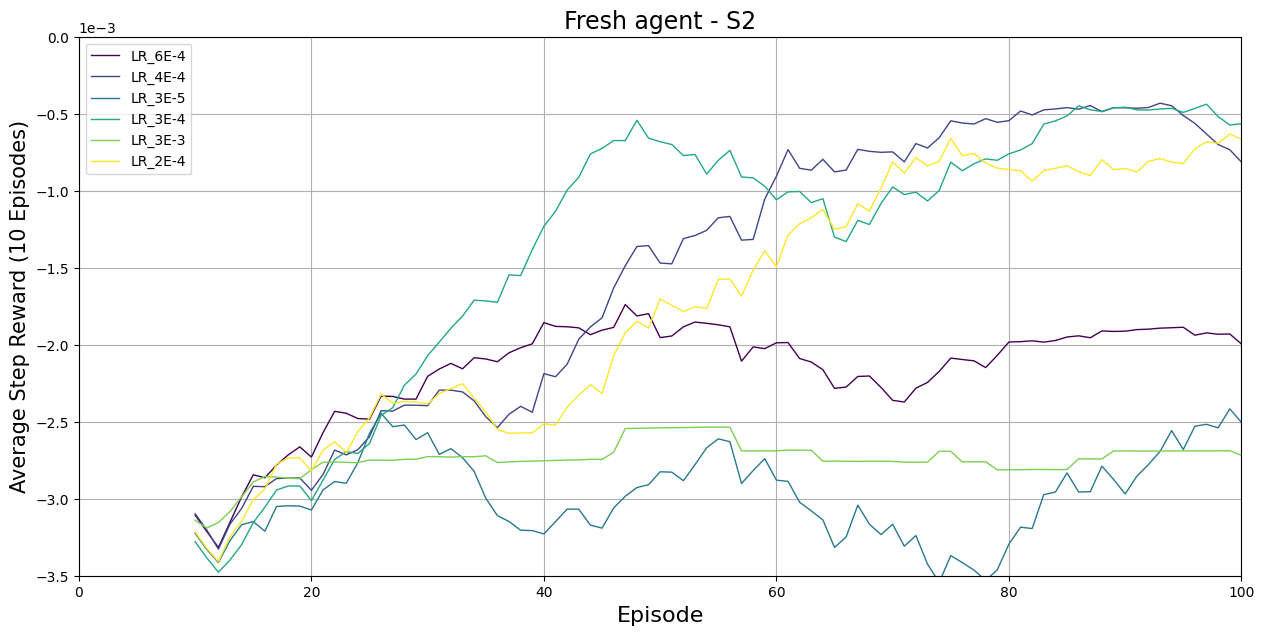

In [7]:
repo_folder_to_plot = 'S2_2X64_NN_LR_100_episodes'
name = 'Fresh agent - S2'
window =10
generate_plot({},window,name, repo_folder=repo_folder_to_plot, xlimits=[0,100], ylimits=[-3.5e-3,0])

## Evauating agents

As a remainder:
1. Baseline is the scenario with the baseline red and green agents.
2. Complex is the Baseline scenario with additional red and green agents.
3. S2 is the complex scenario without the red and green agents that are in the baseline scenario.

We have trained agents up until the number of episodes where learning plateaued. To test catastrophic forgetting, we will evaluate the following agents against the baseline scenario:
1. An agent that is trained for 50 episodes against the baseline scenario.
2. An agent that is trained for 50 epiodes against S2.
3. An agent that is first trained for 50 episodes against the baseline scenario and then trained for 100 episodes against the S2. (it seems that fully training a pre-trained agent takes longer than fully training a fresh agent).
4. An agent that is first trained for 50 episodes against the baseline scenario and then trained against S2 using a CF mitagation strategy (TBC).

In terms of performance, we should have 1. > 4. > 3. > 2.

### Evaluating agent 1.

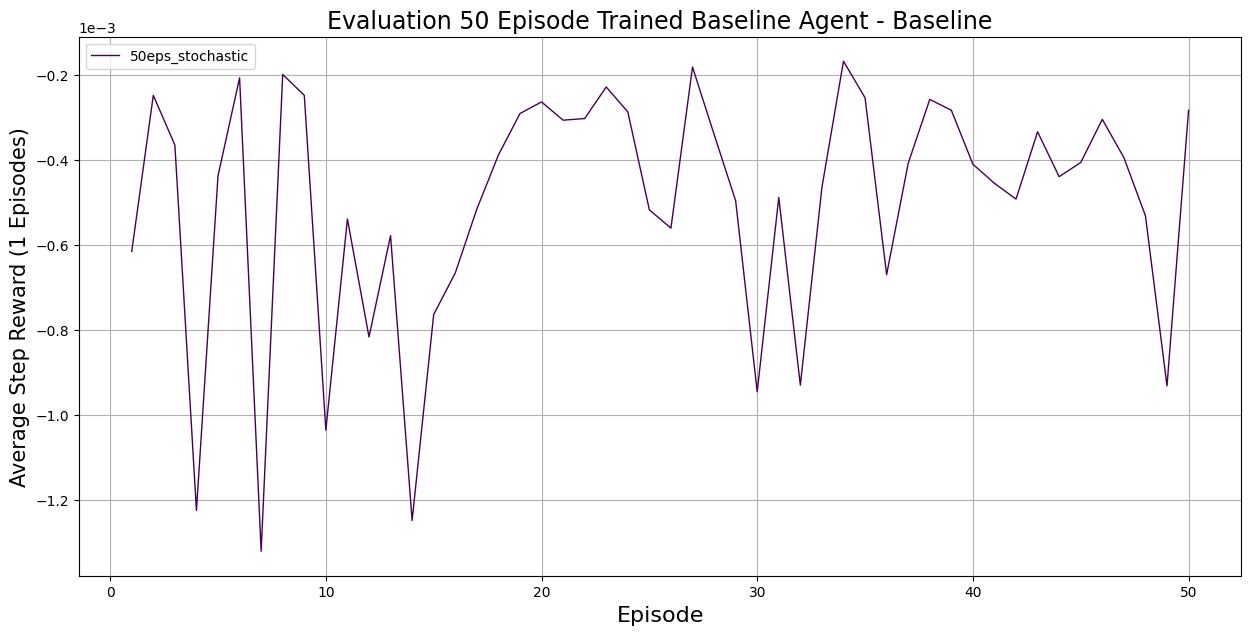

In [12]:
repo_folder_to_plot = 'EVALUATE_50ep_baseline_on_baseline'
name = 'Evaluation 50 Episode Trained Baseline Agent - Baseline'
window =1
generate_plot({},window,name, repo_folder=repo_folder_to_plot)

### Evaluating agent 2.

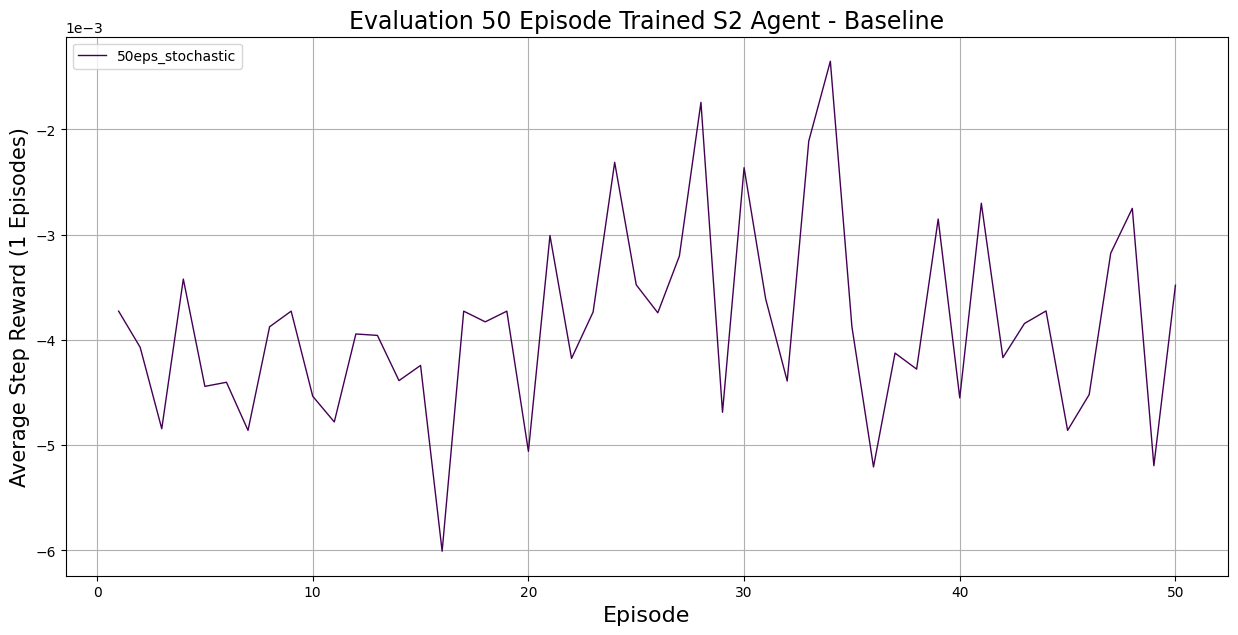

In [11]:
repo_folder_to_plot = 'EVALUATE_50ep_S2_on_baseline'
name = 'Evaluation 50 Episode Trained S2 Agent - Baseline'
window =1
generate_plot({},window,name, repo_folder=repo_folder_to_plot)

### Evaluating Agent 3. 

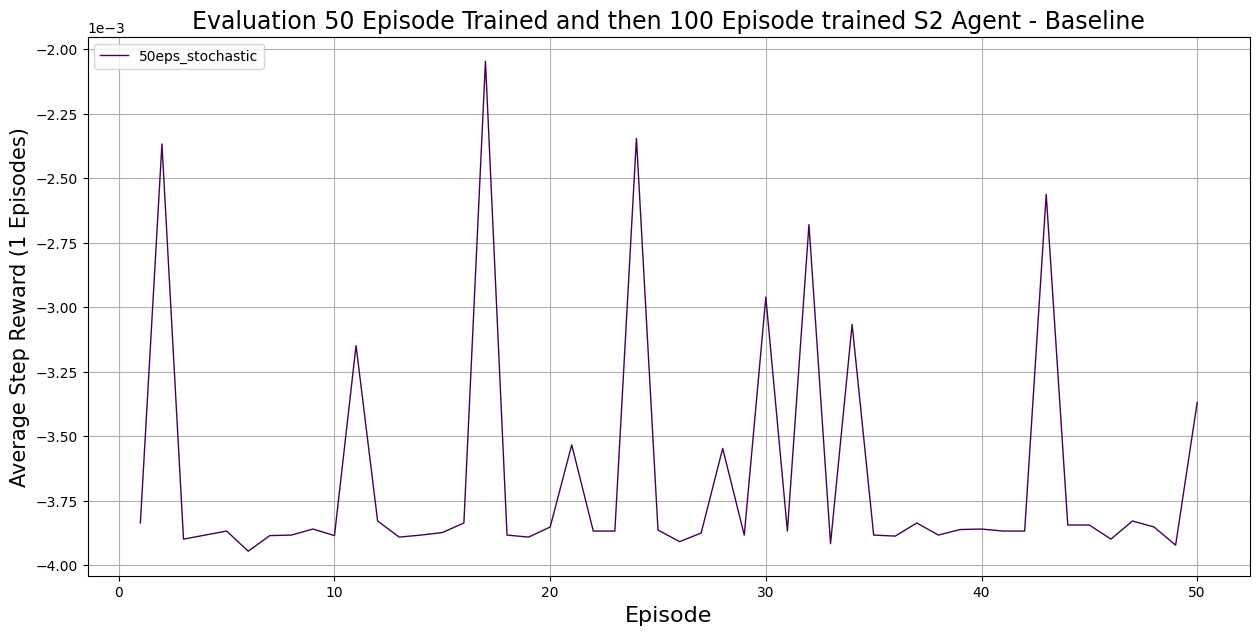

In [14]:
repo_folder_to_plot = 'EVALUATE_Baseline_50ep_S2_100ep_on_baseline'
name = 'Evaluation 50 Episode Trained and then 100 Episode trained S2 Agent - Baseline'
window =1
generate_plot({},window,name, repo_folder=repo_folder_to_plot)

### Plotting the results above together

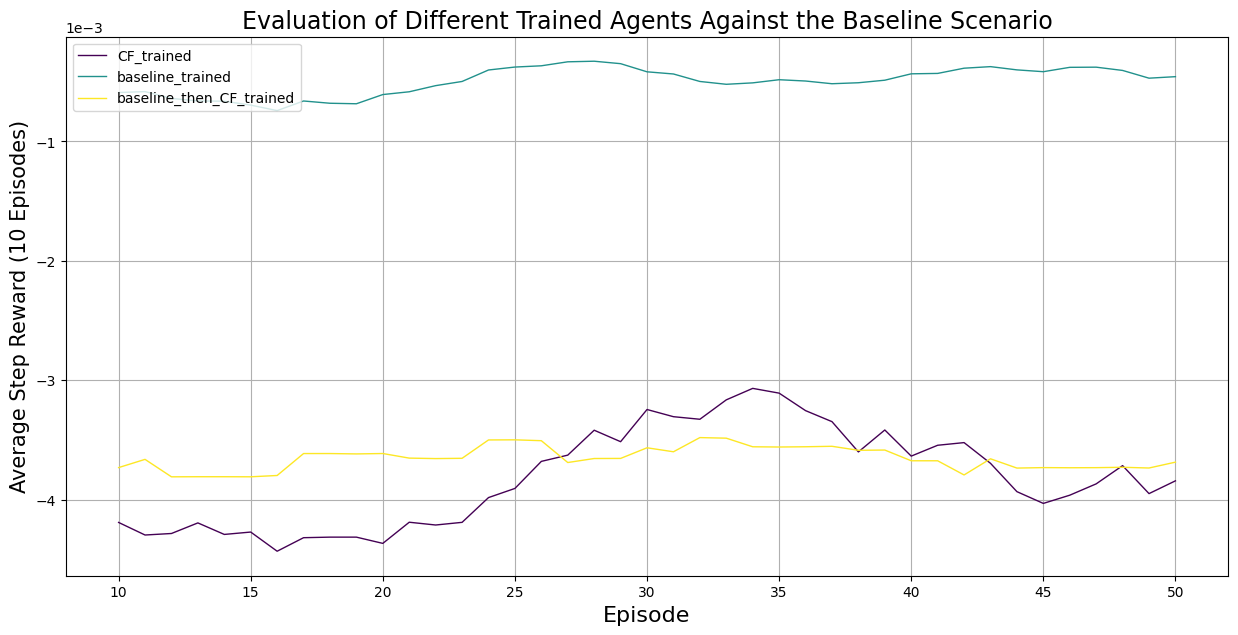

In [20]:
repo_folder_to_plot = 'EVALUATE_results_grouped'
name = 'Evaluation of Different Trained Agents Against the Baseline Scenario'
window =10
generate_plot({},window,name, repo_folder=repo_folder_to_plot)